In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
import os

c:\users\neark\realtimeshipdetector\env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\neark\realtimeshipdetector\env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\neark\realtimeshipdetector\env\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\neark\realtimeshipdetector\env\lib\site-packages\ten

In [2]:
version = 'v1'
model_name = 'faster_rcnn_resnet50_ship_{}'.format(version)
line_color = ['orange', 'brown', 'blue', 'yellow', 'navy', 'red', 'grey']
legend_loc = 'lower right'
legend_fontsize = 20
# 'xx-large'
label_size = 30
line_width = 3.5
x_label = 'Frame(Time step)'
y_label = 'Confidence'

def object_analysis(object_category, object_score):
    fishing = []
    merchant = []
    passenger = []
    sailing = []
    small = []
    tug = []
    warship = []
    for i in range(len(object_score)):
        if object_category[i] == 'fishing':
            fishing.append(object_score[i])
        else:
            fishing.append(None)
    for i in range(len(object_score)):
        if object_category[i] == 'merchant':
            merchant.append(object_score[i])
        else:
            merchant.append(None)
    for i in range(len(object_score)):
        if object_category[i] == 'passenger':
            passenger.append(object_score[i])
        else:
            passenger.append(None)
    for i in range(len(object_score)):
        if object_category[i] == 'sailing':
            sailing.append(object_score[i])
        else:
            sailing.append(None)
    for i in range(len(object_score)):
        if object_category[i] == 'small':
            small.append(object_score[i])
        else:
            small.append(None)
    for i in range(len(object_score)):
        if object_category[i] == 'tug':
            tug.append(object_score[i])
        else:
            tug.append(None)
    for i in range(len(object_score)):
        if object_category[i] == 'warship':
            warship.append(object_score[i])
        else:
            warship.append(None)

    return fishing, merchant, passenger, sailing, small, tug, warship


def all_ap(object_score):
    sum = 0
    size = 0
    for i in object_score:
        if math.isnan(i) == True:
            pass
        else:
            sum += i
            size += 1
    return sum/size


def specific_ap(object_score):
    sum = 0
    size = 0
    for i in object_score:
        if i == None:
            pass
        else:
            sum += i
            size += 1
    return sum/size


def average_fps(object_fps):
    sum = 0
    size = 0
    for i in object_fps:
        if (math.isnan(i) == True):
            pass
        else:
            sum += i
            size += 1
    return sum/size


def average_speed(object_speed):
    sum = 0
    size = 0
    for i in object_speed:
        if (math.isnan(i) == True):
            pass
        else:
            sum += i
            size += 1
    return sum/size

In [3]:
data_dir = 'time_series_data/'

category = 'fishing'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

fishing_frame = prc['frame'].tolist()
fishing_category = prc['category'].tolist()
fishing_score = prc['score'].tolist()
fishing_fps = prc['fps'].tolist()

print('fishing AP:', all_ap(fishing_score))
# =====================================================
# =====================================================
category = 'merchant'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

merchant_frame = prc['frame'].tolist()
merchant_category = prc['category'].tolist()
merchant_score = prc['score'].tolist()
merchant_fps = prc['fps'].tolist()

print('merchant AP:', all_ap(merchant_score))
# =====================================================
# =====================================================
category = 'passenger'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

passenger_frame = prc['frame'].tolist()
passenger_category = prc['category'].tolist()
passenger_score = prc['score'].tolist()
passenger_fps = prc['fps'].tolist()

print('passenger AP:', all_ap(passenger_score))
# =====================================================
# =====================================================
category = 'sailing'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

sailing_frame = prc['frame'].tolist()
sailing_category = prc['category'].tolist()
sailing_score = prc['score'].tolist()
sailing_fps = prc['fps'].tolist()

print('sailing AP:', all_ap(sailing_score))
# =====================================================
# =====================================================
category = 'small'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

small_frame = prc['frame'].tolist()
small_category = prc['category'].tolist()
small_score = prc['score'].tolist()
small_fps = prc['fps'].tolist()

print('small AP:', all_ap(small_score))
# =====================================================
# =====================================================
category = 'tug'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

tug_frame = prc['frame'].tolist()
tug_category = prc['category'].tolist()
tug_score = prc['score'].tolist()
tug_fps = prc['fps'].tolist()

print('tug AP:', all_ap(tug_score))
# =====================================================
# =====================================================
category = 'warship'
data_path = '{}{}/{}_{}.csv'.format(data_dir, version, category, model_name)
prc = pd.read_csv(data_path)

warship_frame = prc['frame'].tolist()
warship_category = prc['category'].tolist()
warship_score = prc['score'].tolist()
warship_fps = prc['fps'].tolist()

print('warship AP:', all_ap(warship_score))
# =====================================================
# =====================================================
_mAP = (all_ap(fishing_score) + all_ap(merchant_score) + \
        all_ap(passenger_score) + all_ap(sailing_score) + \
        all_ap(small_score) + all_ap(tug_score) + \
        all_ap(warship_score)) / 7
print('mAP:', _mAP)

fishing AP: 0.9072683660835543
merchant AP: 0.9426617213896105
passenger AP: 0.9850428748803585
sailing AP: 0.9988134100343833
small AP: 0.9898792212142756
tug AP: 0.9894671229314548
warship AP: 0.9669952619643438
mAP: 0.9685897112139971


fishing AP: 0.934302263534986


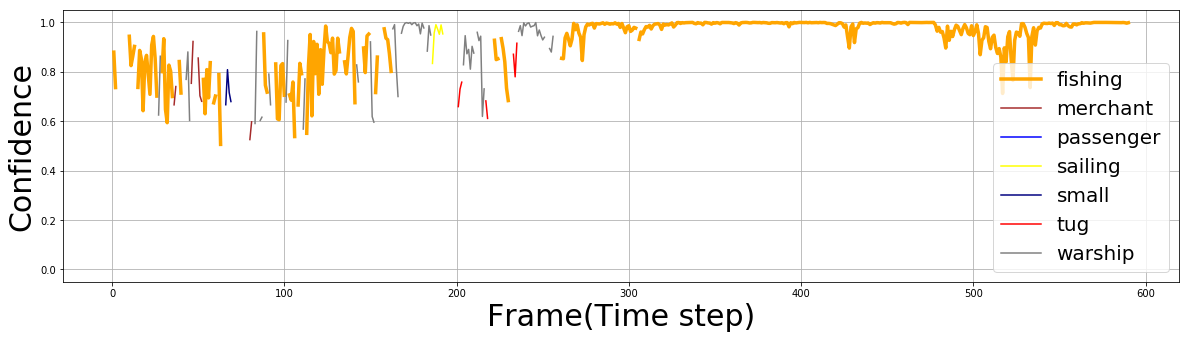

merchant AP: 0.9426617213896105


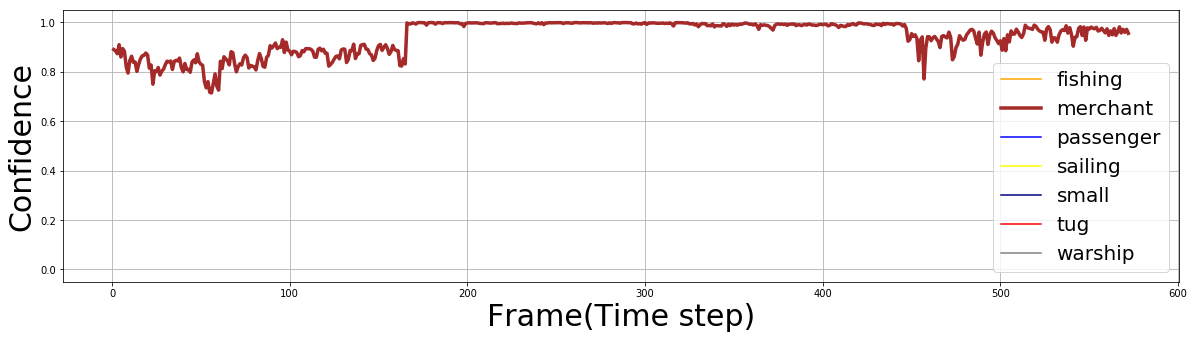

passenger AP: 0.9850428748803585


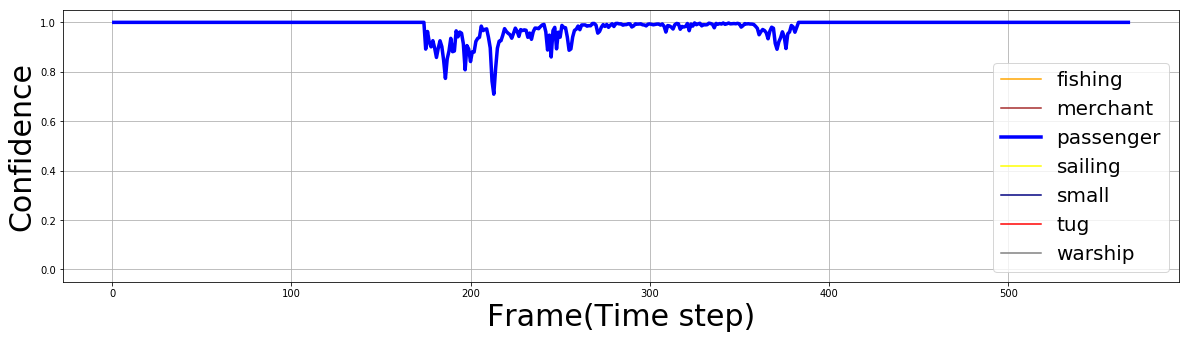

sailing AP: 0.9988134100343833


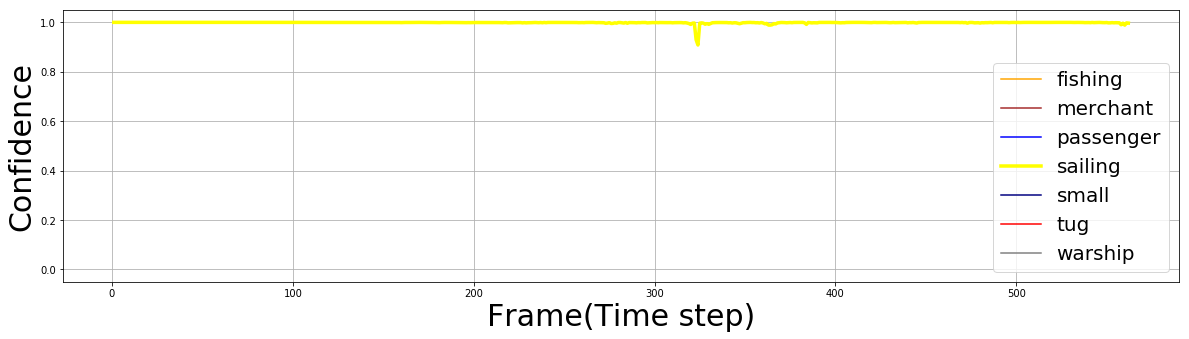

small AP: 0.9898792212142756


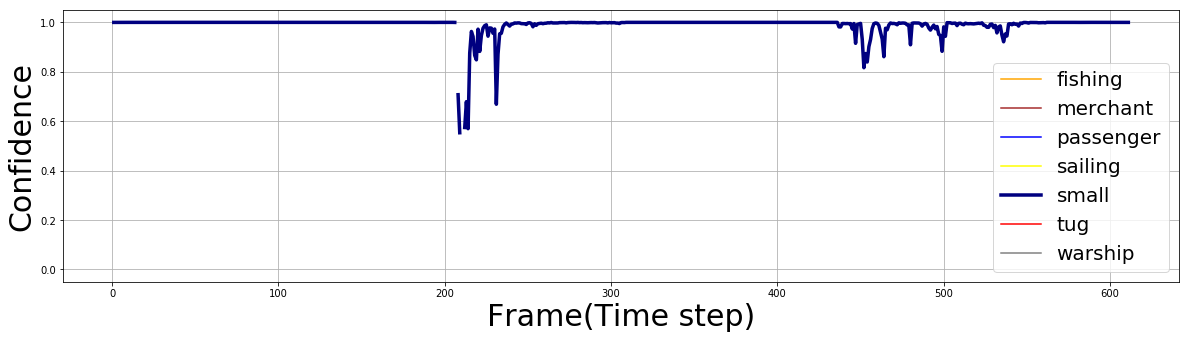

tug AP: 0.9901272616944872


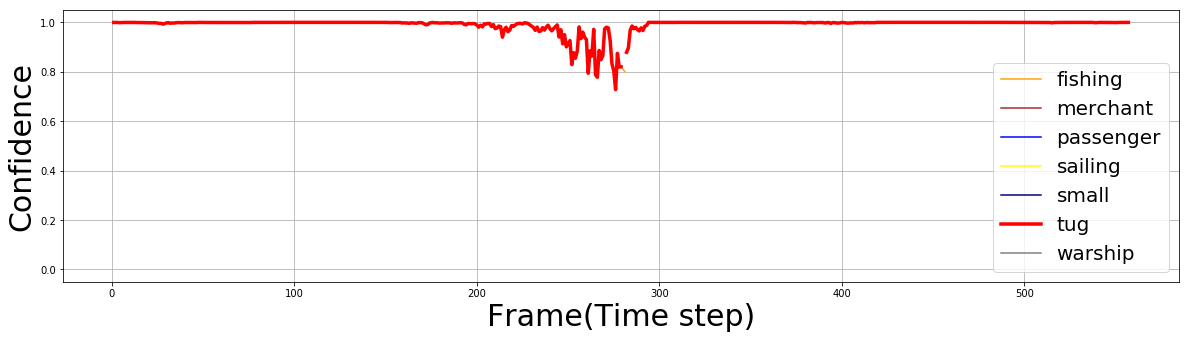

warship AP: 0.9932974310657924


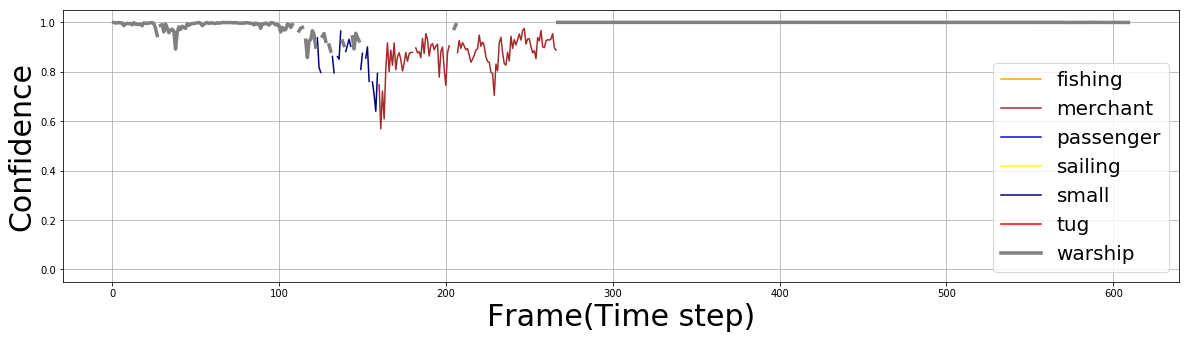

mAP: 0.976303454830556


In [4]:
savefig_dir = 'savefig/'
savefig_path = '{}{}'.format(data_dir, savefig_dir)
if not os.path.isdir(savefig_path):
    os.mkdir(savefig_path)

fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(fishing_category, fishing_score)

fishing_ap = specific_ap(fishing_precision)
print('fishing AP:', specific_ap(fishing_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(fishing_frame, fishing_precision, line_color[0], label='fishing', linewidth=line_width)
plt.plot(fishing_frame, merchant_precision, line_color[1], label='merchant')
plt.plot(fishing_frame, passenger_precision, line_color[2], label='passenger')
plt.plot(fishing_frame, sailing_precision, line_color[3], label='sailing')
plt.plot(fishing_frame, small_precision, line_color[4], label='small')
plt.plot(fishing_frame, tug_precision, line_color[5], label='tug')
plt.plot(fishing_frame, warship_precision, line_color[6], label='warship')
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'fishing'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(merchant_category, merchant_score)

merchant_ap = specific_ap(merchant_precision)
print('merchant AP:', specific_ap(merchant_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(merchant_frame, fishing_precision, line_color[0], label='fishing')
plt.plot(merchant_frame, merchant_precision, line_color[1], label='merchant', linewidth=line_width)
plt.plot(merchant_frame, passenger_precision, line_color[2], label='passenger')
plt.plot(merchant_frame, sailing_precision, line_color[3], label='sailing')
plt.plot(merchant_frame, small_precision, line_color[4], label='small')
plt.plot(merchant_frame, tug_precision, line_color[5], label='tug')
plt.plot(merchant_frame, warship_precision, line_color[6], label='warship')
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'merchant'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(passenger_category, passenger_score)

passenger_ap = specific_ap(passenger_precision)
print('passenger AP:', specific_ap(passenger_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(passenger_frame, fishing_precision, line_color[0], label='fishing')
plt.plot(passenger_frame, merchant_precision, line_color[1], label='merchant')
plt.plot(passenger_frame, passenger_precision, line_color[2], label='passenger', linewidth=line_width)
plt.plot(passenger_frame, sailing_precision, line_color[3], label='sailing')
plt.plot(passenger_frame, small_precision, line_color[4], label='small')
plt.plot(passenger_frame, tug_precision, line_color[5], label='tug')
plt.plot(passenger_frame, warship_precision, line_color[6], label='warship')
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'passenger'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(sailing_category, sailing_score)

sailing_ap = specific_ap(sailing_precision)
print('sailing AP:', specific_ap(sailing_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(sailing_frame, fishing_precision, line_color[0], label='fishing')
plt.plot(sailing_frame, merchant_precision, line_color[1], label='merchant')
plt.plot(sailing_frame, passenger_precision, line_color[2], label='passenger')
plt.plot(sailing_frame, sailing_precision, line_color[3], label='sailing', linewidth=line_width)
plt.plot(sailing_frame, small_precision, line_color[4], label='small')
plt.plot(sailing_frame, tug_precision, line_color[5], label='tug')
plt.plot(sailing_frame, warship_precision, line_color[6], label='warship')
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'sailing'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(small_category, small_score)

small_ap = specific_ap(small_precision)
print('small AP:', specific_ap(small_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(small_frame, fishing_precision, line_color[0], label='fishing')
plt.plot(small_frame, merchant_precision, line_color[1], label='merchant')
plt.plot(small_frame, passenger_precision, line_color[2], label='passenger')
plt.plot(small_frame, sailing_precision, line_color[3], label='sailing')
plt.plot(small_frame, small_precision, line_color[4], label='small', linewidth=line_width)
plt.plot(small_frame, tug_precision, line_color[5], label='tug')
plt.plot(small_frame, warship_precision, line_color[6], label='warship')
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'small'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(tug_category, tug_score)

tug_ap = specific_ap(tug_precision)
print('tug AP:', specific_ap(tug_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(tug_frame, fishing_precision, line_color[0], label='fishing')
plt.plot(tug_frame, merchant_precision, line_color[1], label='merchant')
plt.plot(tug_frame, passenger_precision, line_color[2], label='passenger')
plt.plot(tug_frame, sailing_precision, line_color[3], label='sailing')
plt.plot(tug_frame, small_precision, line_color[4], label='small')
plt.plot(tug_frame, tug_precision, line_color[5], label='tug', linewidth=line_width)
plt.plot(tug_frame, warship_precision, line_color[6], label='warship')
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'tug'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
fishing_precision, \
merchant_precision, \
passenger_precision, \
sailing_precision, \
small_precision, \
tug_precision, \
warship_precision = object_analysis(warship_category, warship_score)

warship_ap = specific_ap(warship_precision)
print('warship AP:', specific_ap(warship_precision))

plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(warship_frame, fishing_precision, line_color[0], label='fishing')
plt.plot(warship_frame, merchant_precision, line_color[1], label='merchant')
plt.plot(warship_frame, passenger_precision, line_color[2], label='passenger')
plt.plot(warship_frame, sailing_precision, line_color[3], label='sailing')
plt.plot(warship_frame, small_precision, line_color[4], label='small')
plt.plot(warship_frame, tug_precision, line_color[5], label='tug')
plt.plot(warship_frame, warship_precision, line_color[6], label='warship', linewidth=line_width)
plt.xlabel(x_label, size=label_size)
plt.ylabel(y_label, size=label_size)
plt.ylim([-0.05, 1.05])
# plt.title('MobileNet')
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.savefig('{}{}_{}.png'.format(savefig_path, model_name, 'warship'), 
            bbox_inches='tight',
            dpi=1000)
plt.show()
# =====================================================
# =====================================================
_mAP = (fishing_ap + merchant_ap + passenger_ap + sailing_ap + small_ap + tug_ap + warship_ap) / 7
print('mAP:', _mAP)

# 선박 검출 및 분류 모델에 따른 처리속도 비교

In [5]:
"""
    ssd mobilenet
"""
model_name = 'ssd_mobilenet_ship_{}'.format(version)
category = 'passenger'
data_path = 'time_series_data/{}/{}_{}.csv'.format(version, category, model_name)
prc = pd.read_csv(data_path)

ssd_mobilenet_frame = prc['frame'].tolist()
ssd_mobilenet_fps = prc['fps'].tolist()
ssd_mobilenet_fps[0] = None
ssd_mobilenet_fps[1] = None
ssd_mobilenet_speed = prc['speed(ms)'].tolist()
ssd_mobilenet_speed[0] = None
ssd_mobilenet_speed[1] = None

"""
    ssd inception
"""
model_name = 'ssd_inception_ship_{}'.format(version)
category = 'passenger'
data_path = 'time_series_data/{}/{}_{}.csv'.format(version, category, model_name)
prc = pd.read_csv(data_path)

ssd_inception_frame = prc['frame'].tolist()
ssd_inception_fps = prc['fps'].tolist()
ssd_inception_fps[0] = None
ssd_inception_fps[1] = None
ssd_inception_speed = prc['speed(ms)'].tolist()
ssd_inception_speed[0] = None
ssd_inception_speed[1] = None

"""
    faster rcnn resnet50
"""
model_name = 'faster_rcnn_resnet50_ship_{}'.format(version)
category = 'passenger'
data_path = 'time_series_data/{}/{}_{}.csv'.format(version, category, model_name)
prc = pd.read_csv(data_path)

faster_rcnn_resnet50_frame = prc['frame'].tolist()
faster_rcnn_resnet50_fps = prc['fps'].tolist()
faster_rcnn_resnet50_fps[0] = None
faster_rcnn_resnet50_fps[1] = None
faster_rcnn_resnet50_speed = prc['speed(ms)'].tolist()
faster_rcnn_resnet50_speed[0] = None
faster_rcnn_resnet50_speed[1] = None

## 1) FPS

In [6]:
print('ssd mobilenet fps:', average_fps(ssd_mobilenet_fps[2:]))
print('ssd inception fps:', average_fps(ssd_inception_fps[2:]))
print('faster rcnn resnet50 fps:', average_fps(faster_rcnn_resnet50_fps[2:]))

ssd mobilenet fps: 44.118114602587745
ssd inception fps: 36.314867256637136
faster rcnn resnet50 fps: 6.806371681415931


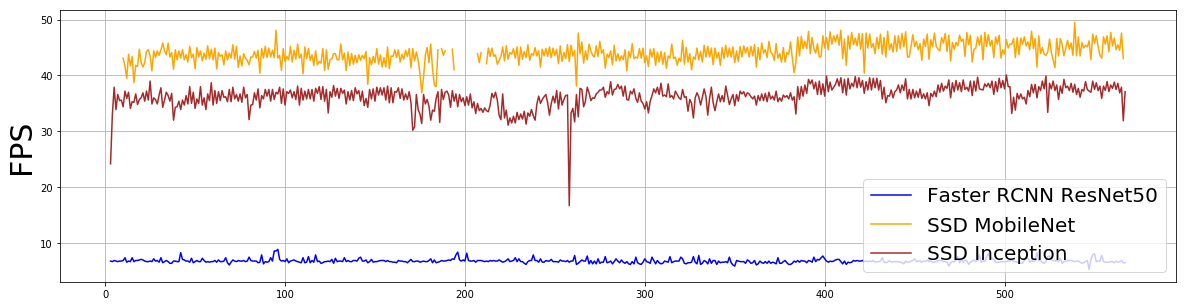

In [7]:
plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(faster_rcnn_resnet50_frame, faster_rcnn_resnet50_fps, line_color[2], label='Faster RCNN ResNet50')
plt.plot(ssd_mobilenet_frame, ssd_mobilenet_fps, line_color[0], label='SSD MobileNet')
plt.plot(ssd_inception_frame, ssd_inception_fps, line_color[1], label='SSD Inception')
# plt.xlabel('frame', size=label_size)
plt.ylabel('FPS', size=label_size)
# plt.ylim([-0.05, 1.05])
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.show()

## 2) processing speed, 단위(ms)

In [8]:
print('ssd mobilenet speed:', average_speed(ssd_mobilenet_speed[2:]))
print('ssd inception speed:', average_speed(ssd_inception_speed[2:]))
print('faster rcnn resnet50 speed:', average_speed(faster_rcnn_resnet50_speed[2:]))

ssd mobilenet speed: 22.70406654343808
ssd inception speed: 27.638938053097338
faster rcnn resnet50 speed: 147.33345132743372


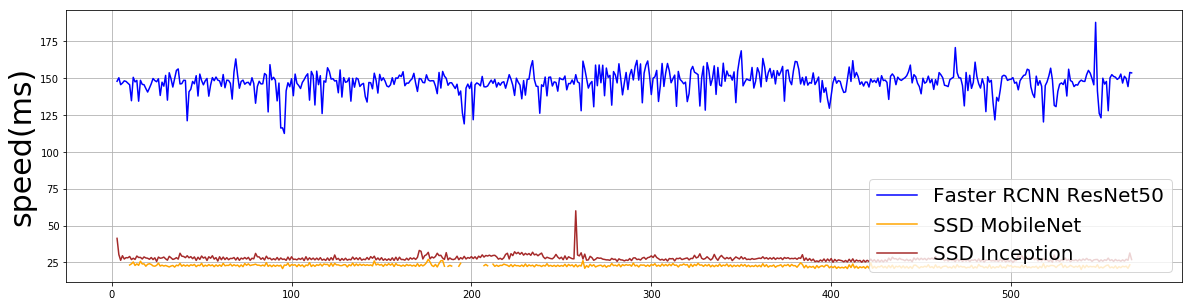

In [9]:
plt.figure(figsize=(20,5))
plt.subplot()
plt.grid()
plt.plot(faster_rcnn_resnet50_frame, faster_rcnn_resnet50_speed, line_color[2], label='Faster RCNN ResNet50')
plt.plot(ssd_mobilenet_frame, ssd_mobilenet_speed, line_color[0], label='SSD MobileNet')
plt.plot(ssd_inception_frame, ssd_inception_speed, line_color[1], label='SSD Inception')
# plt.xlabel('frame', size=label_size)
plt.ylabel('speed(ms)', size=label_size)
# plt.ylim([-0.05, 1.05])
plt.legend(loc=legend_loc, fontsize=legend_fontsize)
plt.show()

# 선박 검출 및 분류 모델별 파라미터 갯수 

In [10]:
ckpt_list = ['ssd_mobilenet_ship_{}/'.format(version),
             'ssd_inception_ship_{}/'.format(version),
             'faster_rcnn_resnet50_ship_{}/'.format(version)]
ckpt_path = 'object_detection/saved_models/'

for ckpt_file in ckpt_list:
    ckpt_fpath = ckpt_path + ckpt_file + 'model.ckpt'
    # Open TensorFlow ckpt
    reader = tf.train.NewCheckpointReader(ckpt_fpath)

    print('\nCount the number of parameters in ckpt file(%s)' % ckpt_fpath)
    param_map = reader.get_variable_to_shape_map()
    total_count = 0
    for k, v in param_map.items():
        if 'Momentum' not in k and 'global_step' not in k:
            temp = np.prod(v)
            total_count += temp
            # print('%s: %s => %d' % (k, str(v), temp))

    print('Total Param Count: %d' % total_count)


Count the number of parameters in ckpt file(object_detection/saved_models/ssd_mobilenet_ship_v1/model.ckpt)
Total Param Count: 5631308

Count the number of parameters in ckpt file(object_detection/saved_models/ssd_inception_ship_v1/model.ckpt)
Total Param Count: 14007204

Count the number of parameters in ckpt file(object_detection/saved_models/faster_rcnn_resnet50_ship_v1/model.ckpt)
Total Param Count: 43378220
